# Setup

In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
from util_func import *

# Question 1
Experiment with different edge detectors: Sobel, Laplacian, Prewitt, Scharr derivatives and Canny operators (all with aperture size of 3) on image named 'pineapple.jfif'. Comment on the results.

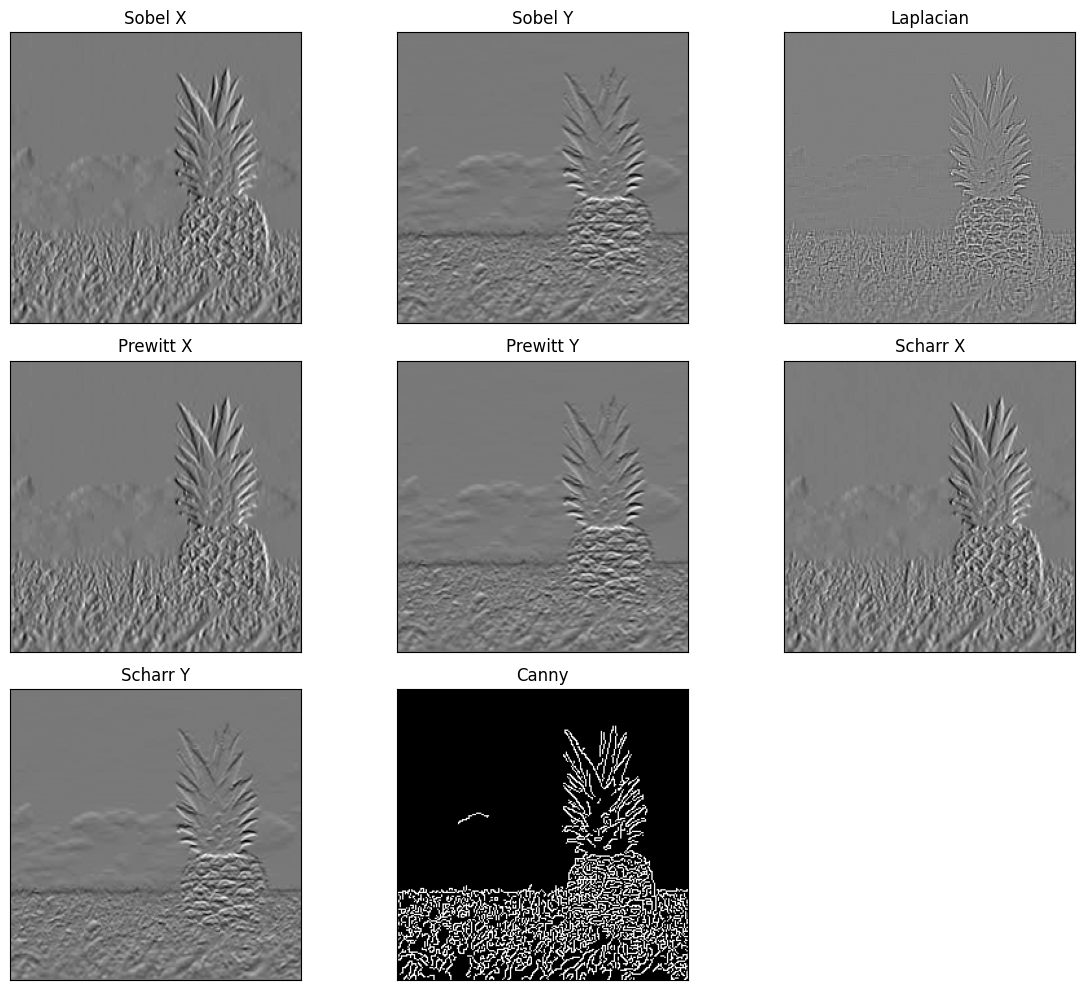

In [12]:
# Load the image
image = cv.imread('images/pineapple.jfif', cv.IMREAD_GRAYSCALE)

# Apply different edge detection methods
sobel_x = cv.Sobel(image, cv.CV_32F, 1, 0, ksize=3)
sobel_y = cv.Sobel(image, cv.CV_32F, 0, 1, ksize=3)
laplacian = cv.Laplacian(image, cv.CV_32F, ksize=3)
prewitt_x = cv.Sobel(image, cv.CV_32F, 1, 0, ksize=3)
prewitt_y = cv.Sobel(image, cv.CV_32F, 0, 1, ksize=3)
scharr_x = cv.Scharr(image, cv.CV_32F, 1, 0)
scharr_y = cv.Scharr(image, cv.CV_32F, 0, 1)
canny = cv.Canny(image, threshold1=100, threshold2=200)

# Create a subplot for each edge detection method
plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 1), plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 3, 2), plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 3, 3), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 3, 4), plt.imshow(prewitt_x, cmap='gray')
plt.title('Prewitt X'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 3, 5), plt.imshow(prewitt_y, cmap='gray')
plt.title('Prewitt Y'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 3, 6), plt.imshow(scharr_x, cmap='gray')
plt.title('Scharr X'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 3, 7), plt.imshow(scharr_y, cmap='gray')
plt.title('Scharr Y'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 3, 8), plt.imshow(canny, cmap='gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

# Question 2
Write a program to identify the white object (probably laptop) present in the image 'electronic.jfif'. Draw bounding boxes on the objects.

In [13]:
# Load the image
image = cv.imread('images/electronic.jfif')

# Convert the image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Threshold the image to create a binary image
_, thresh = cv.threshold(gray_image, 200, 255, cv.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Create an empty mask to draw detected white objects
mask = np.zeros_like(gray_image)

# Iterate through contours and filter white objects
for contour in contours:
    area = cv.contourArea(contour)
    if area > 100:  # Adjust area threshold as needed
        # Get the bounding rectangle for the contour
        x, y, w, h = cv.boundingRect(contour)
        
        # Draw the bounding box on the original image
        cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with bounding boxes
cv.imshow('Detected White Objects', image)
cv.waitKey(0)
cv.destroyAllWindows()

# Question 3
Isolate the clock with the aid of edge detection and contours' properties. The example result should be as follows:

In [14]:
# Load the image
image = cv.imread('images/clock.jpg', cv.IMREAD_COLOR)

# Convert the image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv.GaussianBlur(gray_image, (5, 5), 0)

# Apply Canny edge detection
edges = cv.Canny(blurred, threshold1=100, threshold2=200)

# Find contours in the edge-detected image
contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Filter the clock contour based on area
clock_contour = None
max_area = 0
for contour in contours:
    area = cv.contourArea(contour)
    if area > max_area:
        max_area = area
        clock_contour = contour

# Fit a circle to the clock contour
if clock_contour is not None:
    (x, y), radius = cv.minEnclosingCircle(clock_contour)
    center = (int(x), int(y))
    radius = int(radius)
    
    # Draw the circle bounding box around the clock
    cv.circle(image, center, radius, (0, 255, 0), 2)

    # Display the result
    cv.imshow('Isolated Clock', image)
    cv.waitKey(0)
    cv.destroyAllWindows()
else:
    print("Clock contour not found.")